In [2]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [4]:
df = pd.read_csv("IMDb Movies India.csv", encoding="latin1")


In [6]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [10]:
df.shape


(15509, 10)

In [12]:
df.columns


Index(['Name', 'Year', 'Duration', 'Genre', 'Rating', 'Votes', 'Director',
       'Actor 1', 'Actor 2', 'Actor 3'],
      dtype='object')

In [14]:
df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [16]:
df = df.dropna()


In [18]:
df.isnull().sum()


Name        0
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [20]:
df['Year'] = df['Year'].str.replace('(', '', regex=False)
df['Year'] = df['Year'].str.replace(')', '', regex=False)
df['Year'] = df['Year'].astype(int)


In [22]:
df['Duration'] = df['Duration'].str.replace(' min', '', regex=False)
df['Duration'] = df['Duration'].astype(int)


In [24]:
df['Votes'] = df['Votes'].str.replace(',', '', regex=False)
df['Votes'] = df['Votes'].astype(int)


In [26]:
df['Rating'] = df['Rating'].astype(float)


In [28]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int32  
 2   Duration  5659 non-null   int32  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int32  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int32(3), object(6)
memory usage: 420.0+ KB


In [30]:
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,...Aur Pyaar Ho Gaya,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,?: A Question Mark,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia


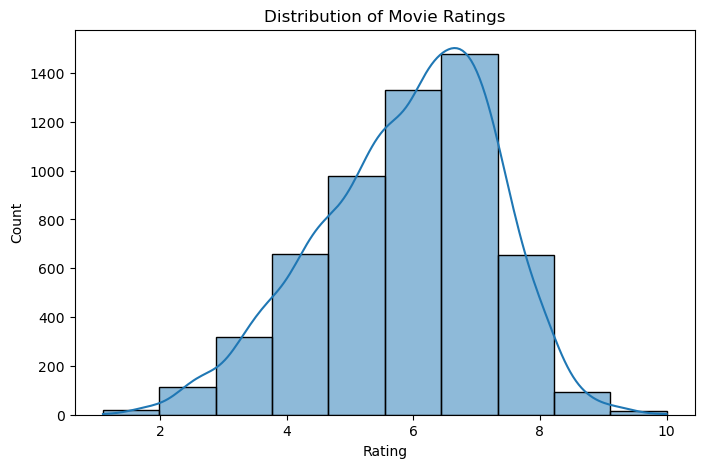

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(df['Rating'], bins=10, kde=True)
plt.title("Distribution of Movie Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


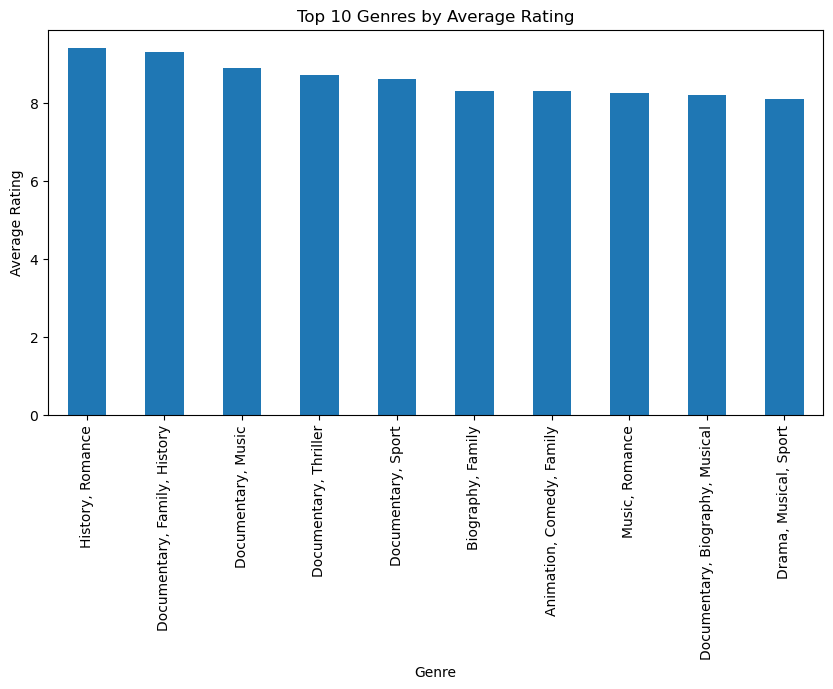

In [34]:
genre_rating = df.groupby('Genre')['Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
genre_rating.plot(kind='bar')
plt.title("Top 10 Genres by Average Rating")
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.show()


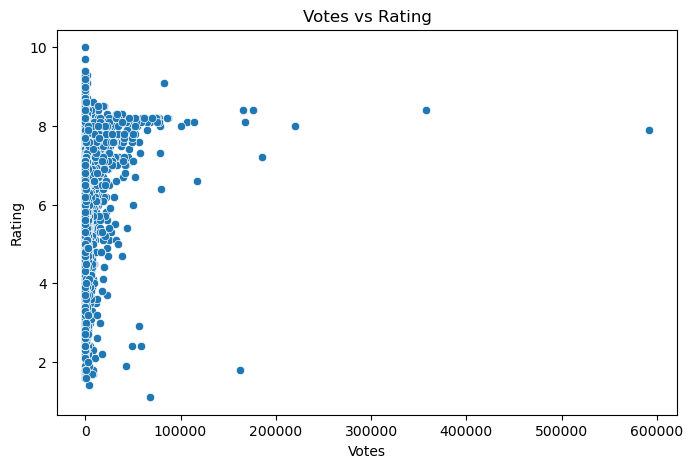

In [36]:
plt.figure(figsize=(8,5))
sns.scatterplot(x=df['Votes'], y=df['Rating'])
plt.title("Votes vs Rating")
plt.xlabel("Votes")
plt.ylabel("Rating")
plt.show()


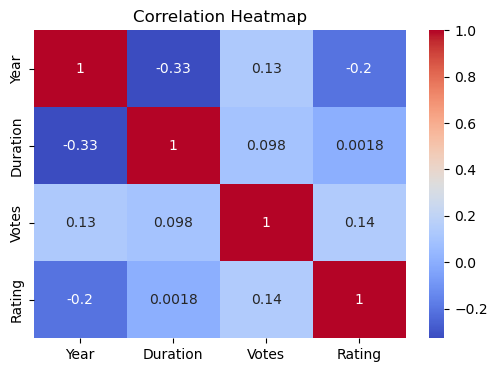

In [38]:
plt.figure(figsize=(6,4))
sns.heatmap(df[['Year','Duration','Votes','Rating']].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [40]:
y = df['Rating']


In [42]:
X = df[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Year', 'Duration', 'Votes']]


In [44]:
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Genre     5659 non-null   object
 1   Director  5659 non-null   object
 2   Actor 1   5659 non-null   object
 3   Actor 2   5659 non-null   object
 4   Actor 3   5659 non-null   object
 5   Year      5659 non-null   int32 
 6   Duration  5659 non-null   int32 
 7   Votes     5659 non-null   int32 
dtypes: int32(3), object(5)
memory usage: 331.6+ KB


In [46]:
le = LabelEncoder()

for col in ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']:
    X[col] = le.fit_transform(X[col])


C:\Users\pc\AppData\Local\Temp\ipykernel_12460\401130055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\pc\AppData\Local\Temp\ipykernel_12460\401130055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
C:\Users\pc\AppData\Local\Temp\ipykernel_12460\401130055.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [48]:
X.head()
X.info()


<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   Genre     5659 non-null   int32
 1   Director  5659 non-null   int32
 2   Actor 1   5659 non-null   int32
 3   Actor 2   5659 non-null   int32
 4   Actor 3   5659 non-null   int32
 5   Year      5659 non-null   int32
 6   Duration  5659 non-null   int32
 7   Votes     5659 non-null   int32
dtypes: int32(8)
memory usage: 221.1 KB


In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [52]:
X_train.shape, X_test.shape


((4527, 8), (1132, 8))

In [54]:
y_train.shape, y_test.shape


((4527,), (1132,))

In [56]:
model = LinearRegression()


In [58]:
model.fit(X_train, y_train)


LinearRegression()

In [60]:
y_pred = model.predict(X_test)


In [62]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R2 Score:", r2)


Mean Absolute Error (MAE): 1.0495625054893818
Mean Squared Error (MSE): 1.6864004365428573
R2 Score: 0.0892905505218129


In [64]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("Random Forest R2:", r2_score(y_test, rf_pred))


Random Forest R2: 0.3119859217329236
